# Tarea 1 Análisis de datos

Referencia: https://www.kaggle.com/datasets/nelgiriyewithana/most-streamed-spotify-songs-2024

## Description

This dataset presents a comprehensive compilation of the most streamed songs on Spotify in 2024. It provides extensive insights into each track's attributes, popularity, and presence on various music platforms, offering a valuable resource for music analysts, enthusiasts, and industry professionals. The dataset includes information such as track name, artist, release date, ISRC, streaming statistics, and presence on platforms like YouTube, TikTok, and more.

## Key Features

- Track Name: Name of the song.
- Album Name: Name of the album the song belongs to.
- Artist: Name of the artist(s) of the song.
- Release Date: Date when the song was released.
- ISRC: International Standard Recording Code for the song.
- All Time Rank: Ranking of the song based on its all-time popularity.
- Track Score: Score assigned to the track based on various factors.
- Spotify Streams: Total number of streams on Spotify.
- Spotify Playlist Count: Number of Spotify playlists the song is included in.
- Spotify Playlist Reach: Reach of the song across Spotify playlists.
- Spotify Popularity: Popularity score of the song on Spotify.
- YouTube Views: Total views of the song's official video on YouTube.
- YouTube Likes: Total likes on the song's official video on YouTube.
- TikTok Posts: Number of TikTok posts featuring the song.
- TikTok Likes: Total likes on TikTok posts featuring the song.
- TikTok Views: Total views on TikTok posts featuring the song.
- YouTube Playlist Reach: Reach of the song across YouTube playlists.
- Apple Music Playlist Count: Number of Apple Music playlists the song is included in.
- AirPlay Spins: Number of times the song has been played on radio stations.
- SiriusXM Spins: Number of times the song has been played on SiriusXM.
- Deezer Playlist Count: Number of Deezer playlists the song is included in.
- Deezer Playlist Reach: Reach of the song across Deezer playlists.
- Amazon Playlist Count: Number of Amazon Music playlists the song is included in.
- Pandora Streams: Total number of streams on Pandora.
- Pandora Track Stations: Number of Pandora stations featuring the song.
- Soundcloud Streams: Total number of streams on Soundcloud.
- Shazam Counts: Total number of times the song has been Shazamed.
- TIDAL Popularity: Popularity score of the song on TIDAL.
- Explicit Track: Indicates whether the song contains explicit content.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import RobustScaler

import joblib

import warnings
warnings.filterwarnings("ignore")
%matplotlib notebook
%matplotlib inline

Los datos fueron descargados y guardados en un guthub para poder tener acceso con el enlace. Para su carga es necesario utilizar `encoding='ISO-8859-1'`, tal como se indica en las discusiones del mismo dataset em Kaggle.

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/desareca/Tareas_Analisis_Datos-G6/main/Most%20Streamed%20Spotify%20Songs%202024.csv', encoding='ISO-8859-1')

In [3]:
df.head()

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.4,"390,470,936","30,716","196,631,588",...,684,62.0,"17,598,718",114.0,"18,004,655","22,931","4,818,457","2,669,262",NaN,0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,545.9,"323,703,884","28,113","174,597,137",...,3,67.0,"10,422,430",111.0,"7,780,028","28,444","6,623,075","1,118,279",NaN,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.4,"601,309,283","54,331","211,607,669",...,536,136.0,"36,321,847",172.0,"5,022,621","5,639","7,208,651","5,285,340",NaN,0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,4,444.9,"2,031,280,633","269,802","136,569,078",...,"2,182",264.0,"24,684,248",210.0,"190,260,277","203,384",NaN,"11,822,942",NaN,0
4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423.3,"107,034,922","7,223","151,469,874",...,1,82.0,"17,660,624",105.0,"4,493,884","7,006","207,179","457,017",NaN,1


Hay varias variables a las que se deben modificar el tipo y realizar algunas transformaciones para ajustar al tipo de variable. Aedmás, existen variables con valores perdidos. En general sería bueno dejar estas variables para verificación, pero `TIDAL Popularity` se eliminará, ya que todos sun valores son `NaN`.

In [4]:
df.shape

(4600, 29)

In [5]:
df.dtypes.value_counts()


,count
object,22
float64,6
int64,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Track                       4600 non-null   object 
 1   Album Name                  4600 non-null   object 
 2   Artist                      4595 non-null   object 
 3   Release Date                4600 non-null   object 
 4   ISRC                        4600 non-null   object 
 5   All Time Rank               4600 non-null   object 
 6   Track Score                 4600 non-null   float64
 7   Spotify Streams             4487 non-null   object 
 8   Spotify Playlist Count      4530 non-null   object 
 9   Spotify Playlist Reach      4528 non-null   object 
 10  Spotify Popularity          3796 non-null   float64
 11  YouTube Views               4292 non-null   object 
 12  YouTube Likes               4285 non-null   object 
 13  TikTok Posts                3427 

In [7]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Track,4600,4370,Danza Kuduro - Cover,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Album Name,4600,4005,Un Verano Sin Ti,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Artist,4595,1999,Drake,63,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Release Date,4600,1562,1/1/2012,38,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ISRC,4600,4598,USWL11700269,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
All Time Rank,4600,4577,"3,441",2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Track Score,4600.0,NaN,NaN,NaN,41.844043,38.543766,19.4,23.3,29.9,44.425,725.4
Spotify Streams,4487,4425,"1,655,575,417",4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Spotify Playlist Count,4530,4207,1,46,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Spotify Playlist Reach,4528,4478,3,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Elimina columna TIDAL Popularity, son todos NaN
df = df.drop('TIDAL Popularity', axis=1)

El código `ISRC` es un identificador único por canción, en el dataset hay valores repetidos, como la información respecto de estas canciones está repetida se eliminan estos duplicados.

In [9]:
# EL codigo ISRC es único por lo que se deben eliminar duplicados
# Primero revisamos si tienen la misma info
# Referencia: https://isrc.ifpi.org/es/
cancion_repetida = (df.groupby('ISRC')['ISRC'].count()>1)
df[df['ISRC'].isin(cancion_repetida[cancion_repetida].index)].T

,2449,2450,3447,3450
Track,Tennessee Orange,Tennessee Orange,Dembow,Dembow
Album Name,Tennessee Orange,Tennessee Orange,Dembow,Dembow
Artist,Megan Moroney,Megan Moroney,Danny Ocean,Danny Ocean
Release Date,9/2/2022,9/2/2022,12/8/2017,12/8/2017
ISRC,TCAGJ2289254,TCAGJ2289254,USWL11700269,USWL11700269
All Time Rank,"2,424","2,424","3,441","3,441"
Track Score,28.9,28.9,23.3,23.3
Spotify Streams,"227,893,586","227,893,586","579,189,526","579,189,526"
Spotify Playlist Count,"28,139","28,139","60,397","60,397"
Spotify Playlist Reach,"12,480,714","12,480,714","11,805,084","11,805,084"


In [10]:
# Se eliminan los duiplicados
df = df.drop_duplicates(subset='ISRC')

In [11]:
df.shape

(4598, 28)

Hay 5 artistas con valores nulos, revisando la mayoría de estos registros tienen sus valores nulos, por lo que se eliminan los registros.

In [12]:
df[df['Artist'].isna()]

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,AirPlay Spins,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,Explicit Track
311,Cool,JnD Mix,NaN,5/25/2024,QZNWQ2410638,311,86.5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"8,624,577",0
480,I Wanna Party,I Wanna Party - Single,NaN,5/31/2024,QZYFZ2445017,482,70.3,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1345,Marlboro Remix,Marlboro Remix - Single,NaN,6/7/2024,QZNWT2471497,"1,343",40.6,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"504,979",0
1561,Melting,Melting - Single,NaN,6/10/2024,QZNWU2402635,"1,553",37.2,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"289,134",0
3402,La ï¿½ï¿½ltima Vez (Yo Te Per,La ï¿½ï¿½ltima Vez (Yo Te Perdï¿½ï¿½),NaN,5/2/2024,MX2832415361,"3,381",23.6,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"1,606,561",0


In [13]:
df[df['Artist'].isna()].info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, 311 to 3402
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Track                       5 non-null      object 
 1   Album Name                  5 non-null      object 
 2   Artist                      0 non-null      object 
 3   Release Date                5 non-null      object 
 4   ISRC                        5 non-null      object 
 5   All Time Rank               5 non-null      object 
 6   Track Score                 5 non-null      float64
 7   Spotify Streams             0 non-null      object 
 8   Spotify Playlist Count      0 non-null      object 
 9   Spotify Playlist Reach      0 non-null      object 
 10  Spotify Popularity          0 non-null      float64
 11  YouTube Views               0 non-null      object 
 12  YouTube Likes               0 non-null      object 
 13  TikTok Posts                0 non-null 

In [14]:
# Se eliminan las canciones sin artista, son sólo 5.
# Estas canciones solo muestran valores nulos en la mayoría de los casos.
# Dependiendo de como se defina el objetivo podría ser necesario reutilizarlo, aunque no creo.
df = df[~df['Artist'].isna()]

In [15]:
df.head()

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,AirPlay Spins,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.4,"390,470,936","30,716","196,631,588",...,"40,975",684,62.0,"17,598,718",114.0,"18,004,655","22,931","4,818,457","2,669,262",0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,545.9,"323,703,884","28,113","174,597,137",...,"40,778",3,67.0,"10,422,430",111.0,"7,780,028","28,444","6,623,075","1,118,279",1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.4,"601,309,283","54,331","211,607,669",...,"74,333",536,136.0,"36,321,847",172.0,"5,022,621","5,639","7,208,651","5,285,340",0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,4,444.9,"2,031,280,633","269,802","136,569,078",...,"1,474,799","2,182",264.0,"24,684,248",210.0,"190,260,277","203,384",NaN,"11,822,942",0
4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423.3,"107,034,922","7,223","151,469,874",...,"12,185",1,82.0,"17,660,624",105.0,"4,493,884","7,006","207,179","457,017",1


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4593 entries, 0 to 4599
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Track                       4593 non-null   object 
 1   Album Name                  4593 non-null   object 
 2   Artist                      4593 non-null   object 
 3   Release Date                4593 non-null   object 
 4   ISRC                        4593 non-null   object 
 5   All Time Rank               4593 non-null   object 
 6   Track Score                 4593 non-null   float64
 7   Spotify Streams             4485 non-null   object 
 8   Spotify Playlist Count      4528 non-null   object 
 9   Spotify Playlist Reach      4526 non-null   object 
 10  Spotify Popularity          3794 non-null   float64
 11  YouTube Views               4290 non-null   object 
 12  YouTube Likes               4283 non-null   object 
 13  TikTok Posts                3425 non-n

La fecha de lanzamiento está en formato texto, se transforma a tipo datetime. Además, se crean variables auxiliares de año y mes que podrían ayudar en algunos análisis y visualizaciones.

In [17]:
# Pasamos a datetime la fecha
df['Release Date'] = pd.to_datetime(df['Release Date'], format='%m/%d/%Y')
# Agrega Año y Mes
df['Release Date Year'] = df['Release Date'].dt.year
df['Release Date Month'] = df['Release Date'].dt.month_name()

Hay variables relacionadas con estadisticas de las plataformas que están en formato que no puede ser transformable directamente a numero, se genera una transformación para estas variables.

In [18]:
# Hay un momton de variables tipo string que son cantidades asociadas a plataformas.
cols_plataformas = ['Spotify Streams', 'Spotify Playlist Count', 'Spotify Playlist Reach', 'YouTube Views', 'YouTube Likes', 'TikTok Posts',
                    'TikTok Likes', 'TikTok Views', 'YouTube Playlist Reach', 'AirPlay Spins', 'SiriusXM Spins', 'Deezer Playlist Reach',
                    'Pandora Streams', 'Pandora Track Stations', 'Soundcloud Streams', 'Shazam Counts', 'All Time Rank']

for col_p in cols_plataformas:
    df[col_p] = df[col_p].str.replace(',', '').astype(float)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4593 entries, 0 to 4599
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Track                       4593 non-null   object        
 1   Album Name                  4593 non-null   object        
 2   Artist                      4593 non-null   object        
 3   Release Date                4593 non-null   datetime64[ns]
 4   ISRC                        4593 non-null   object        
 5   All Time Rank               4593 non-null   float64       
 6   Track Score                 4593 non-null   float64       
 7   Spotify Streams             4485 non-null   float64       
 8   Spotify Playlist Count      4528 non-null   float64       
 9   Spotify Playlist Reach      4526 non-null   float64       
 10  Spotify Popularity          3794 non-null   float64       
 11  YouTube Views               4290 non-null   float64       
 1

***Nota:*** hay que evaluar bien que hacer con las variables con muchos NaN, de momento se están imputando más adelante.

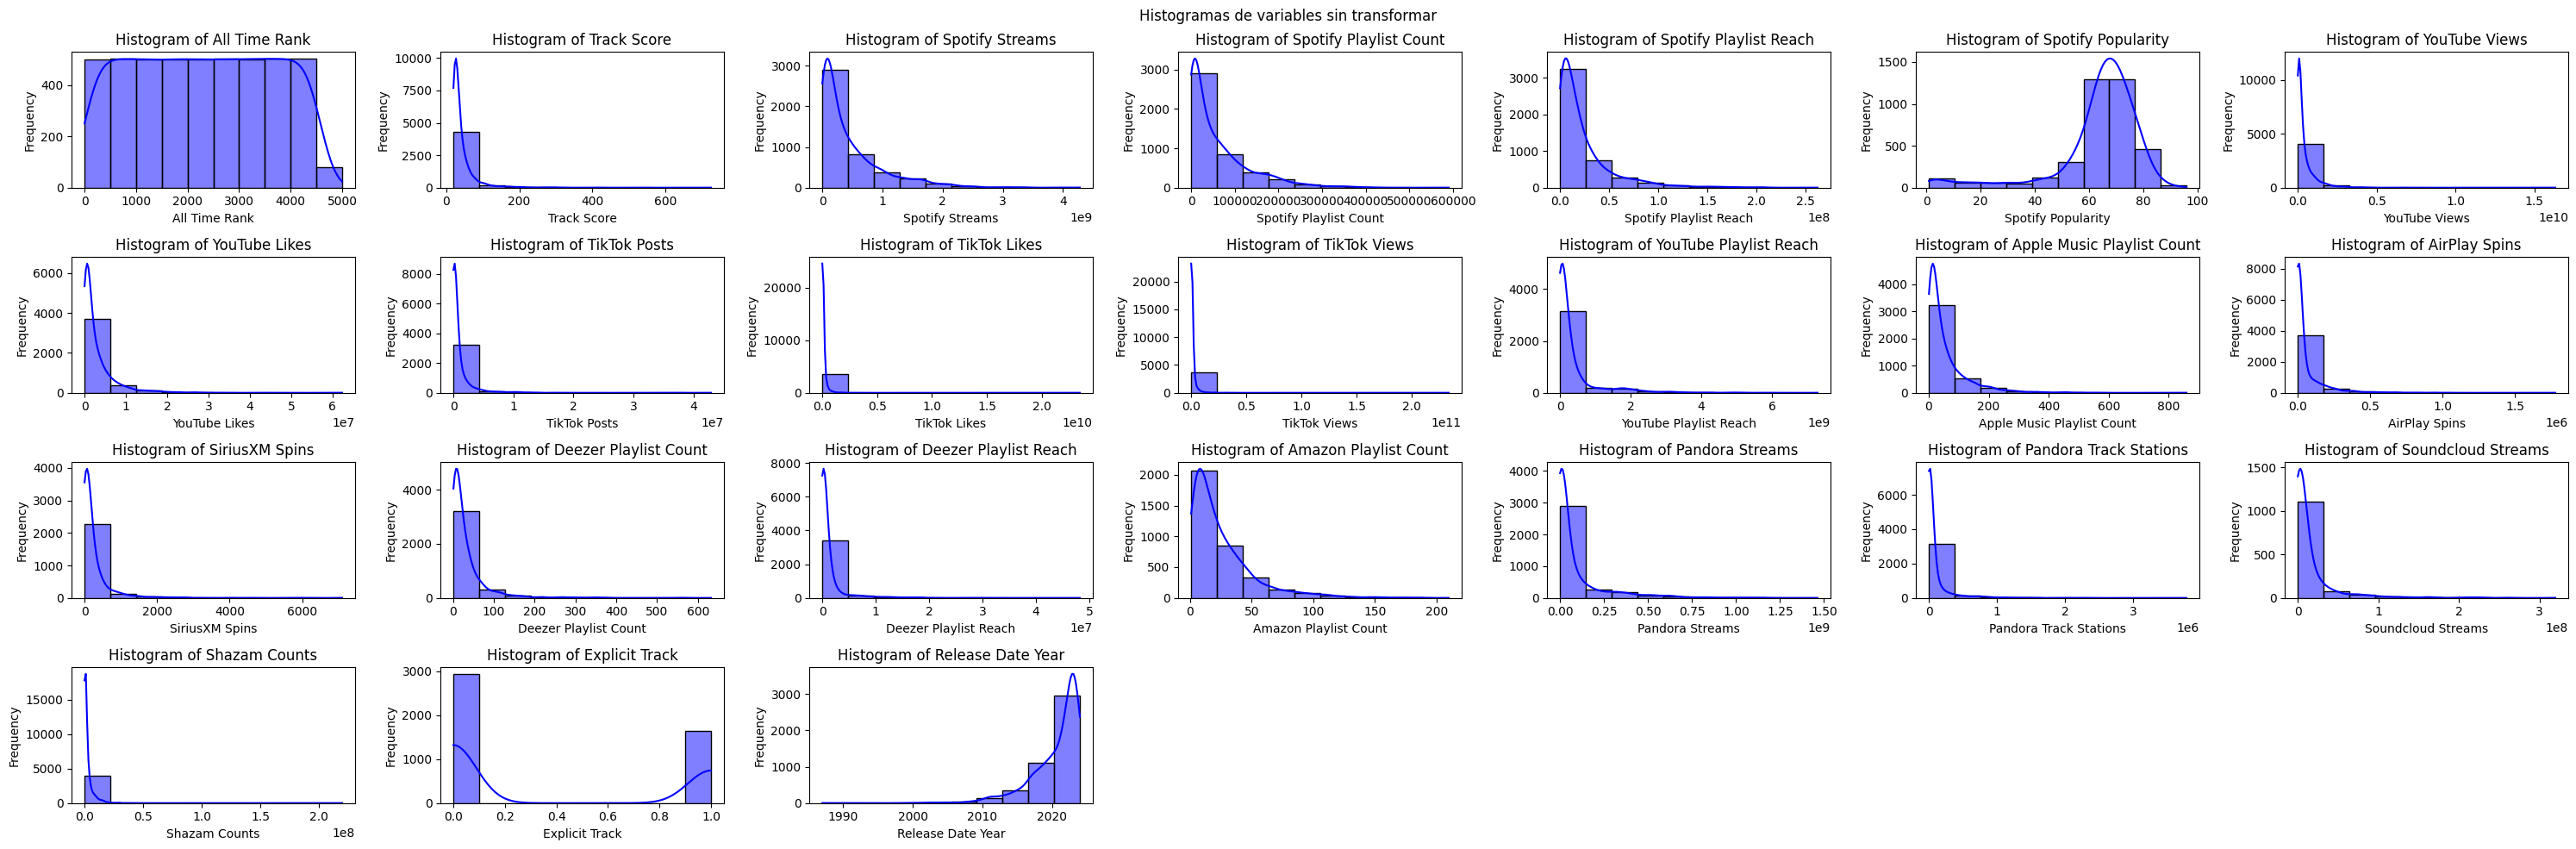

In [20]:
# Visualización Histogramas
numeric_columns = df.select_dtypes(include='number').columns

n_cols = 7
n_rows = len(numeric_columns) // n_cols + int(len(numeric_columns) % n_cols != 0)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(30, 2.5 * n_rows))
axes = axes.flatten() if len(numeric_columns) > 1 else [axes]

for i, col in enumerate(numeric_columns):
    sns.histplot(df[col], kde=True, ax=axes[i], color='blue', bins=10)
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle('Histogramas de variables sin transformar')

plt.tight_layout()
plt.show()

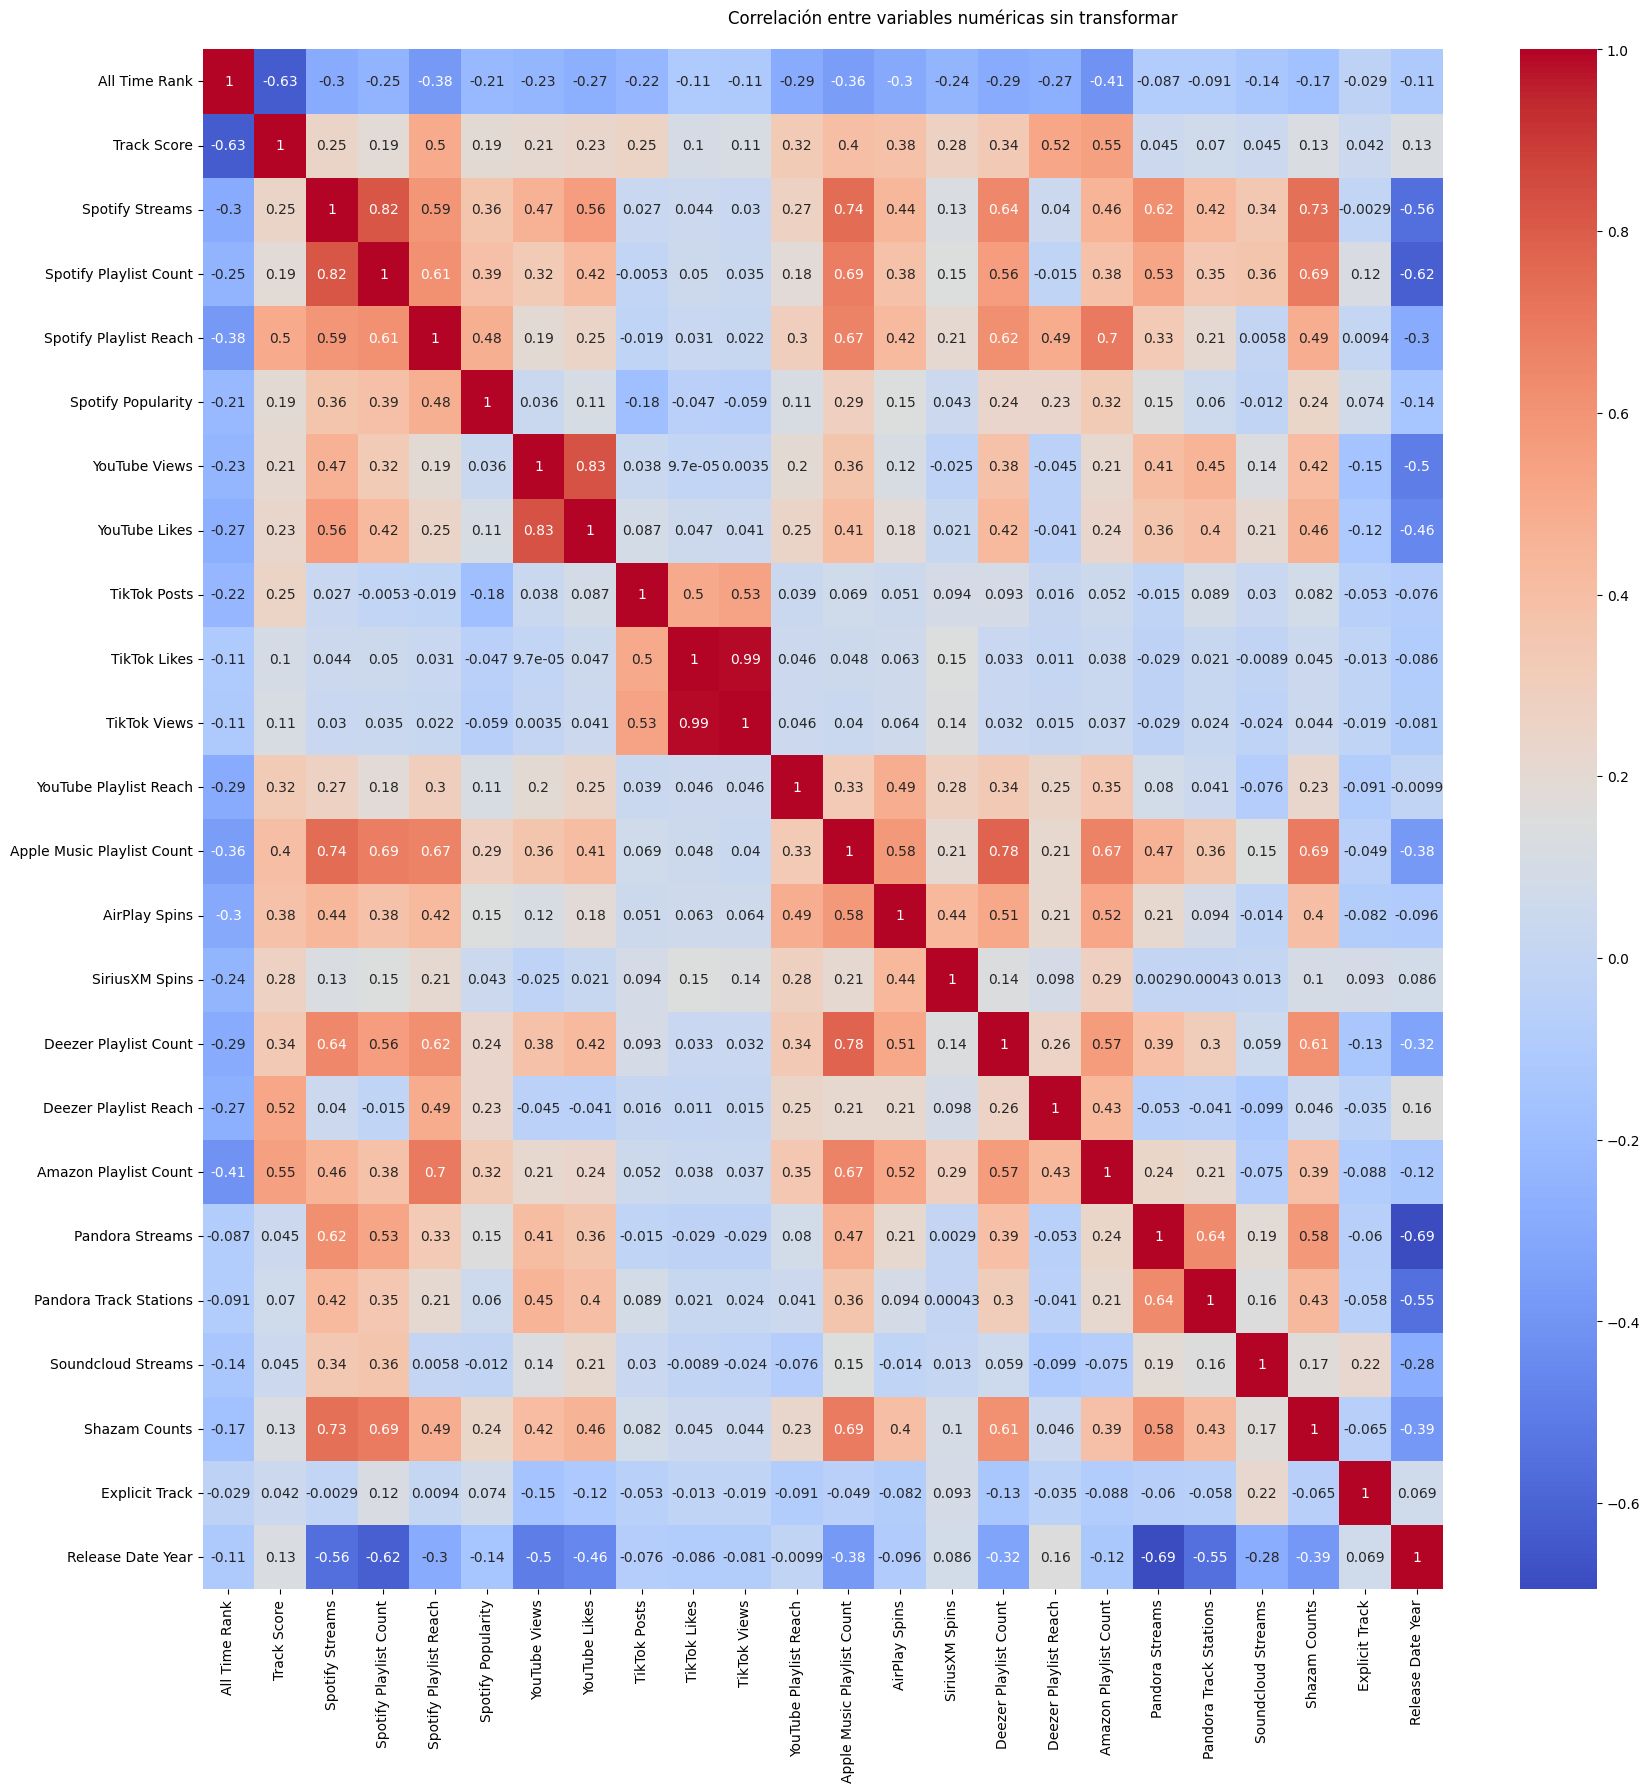

In [21]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.suptitle('Correlación entre variables numéricas sin transformar', y=0.9)
plt.show()

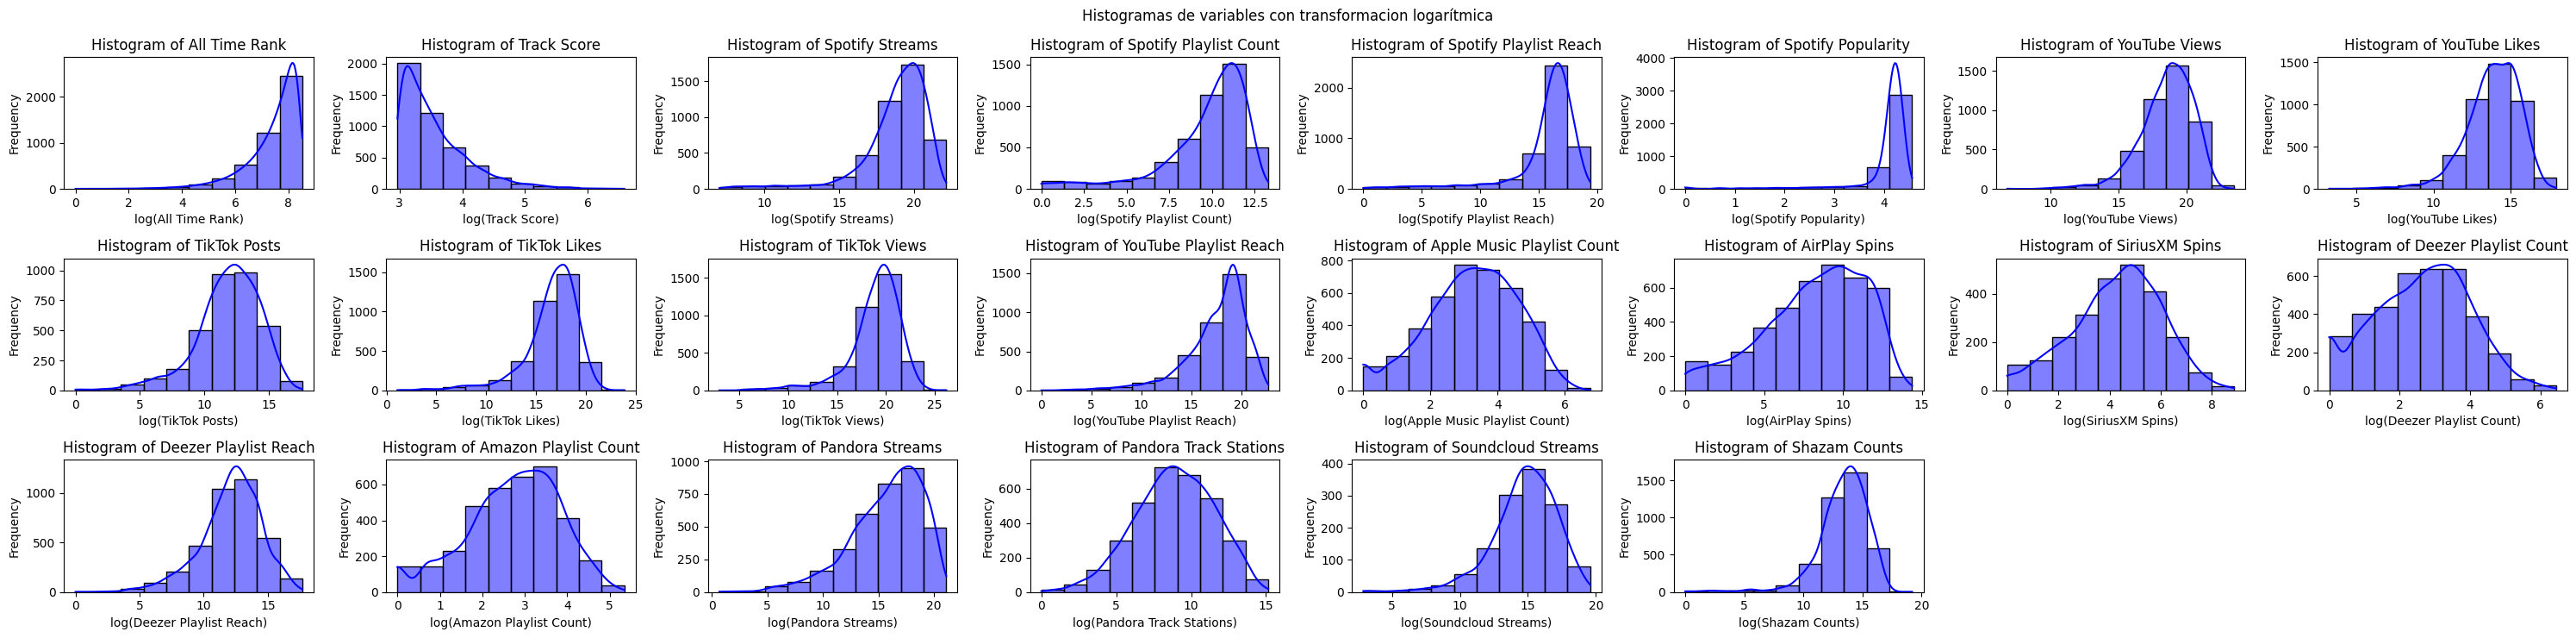

In [22]:
# Hay varias columnas numericas que al aplciar log podrían normalizar su distribucion
# Visualización Histogramas
cols_transf_log = ['All Time Rank', 'Track Score', 'Spotify Streams', 'Spotify Playlist Count', 'Spotify Playlist Reach', 'Spotify Popularity', 'YouTube Views', 'YouTube Likes', 'TikTok Posts',
       'TikTok Likes', 'TikTok Views', 'YouTube Playlist Reach', 'Apple Music Playlist Count', 'AirPlay Spins', 'SiriusXM Spins', 'Deezer Playlist Count', 'Deezer Playlist Reach',
       'Amazon Playlist Count', 'Pandora Streams', 'Pandora Track Stations', 'Soundcloud Streams', 'Shazam Counts']

n_cols = 8
n_rows = len(cols_transf_log) // n_cols + int(len(cols_transf_log) % n_cols != 0)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(30, 2.5 * n_rows))
axes = axes.flatten() if len(cols_transf_log) > 1 else [axes]

df_transf_log = df.copy()
for i, col in enumerate(cols_transf_log):
    df_transf_log[col] = df_transf_log[col].apply(np.log)
    sns.histplot(df_transf_log[col], kde=True, ax=axes[i], color='blue', bins=10)
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(f'log({col})')
    axes[i].set_ylabel('Frequency')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle('Histogramas de variables con transformacion logarítmica')

plt.tight_layout()
plt.show()

In [23]:
# imputar por mediana para evitar problemas por las colas
columns_imputed = df.select_dtypes(include='number').columns
df_imputado = df_transf_log.copy()

imputer = SimpleImputer(strategy='median')
imputer.fit(df_imputado[columns_imputed])

joblib.dump(imputer, 'imputer_mediana.pkl')

imputer_loaded = joblib.load('imputer_mediana.pkl')

df_imputado[columns_imputed] = imputer_loaded.transform(df_imputado[columns_imputed])

In [24]:
# En primera instancia vamos a standarizar con la mediana y el intervalo intercuartil
# para disminuir el efecto de las colas
columns_normalized = df.select_dtypes(include='number').columns
df_normalizado = df_imputado.copy()

scaler = RobustScaler()
scaler.fit(df_normalizado[columns_normalized])

joblib.dump(scaler, 'scaler_mediana.pkl')

scaler_loaded = joblib.load('scaler_mediana.pkl')

df_normalizado[columns_normalized] = scaler_loaded.transform(df_normalizado[columns_normalized])

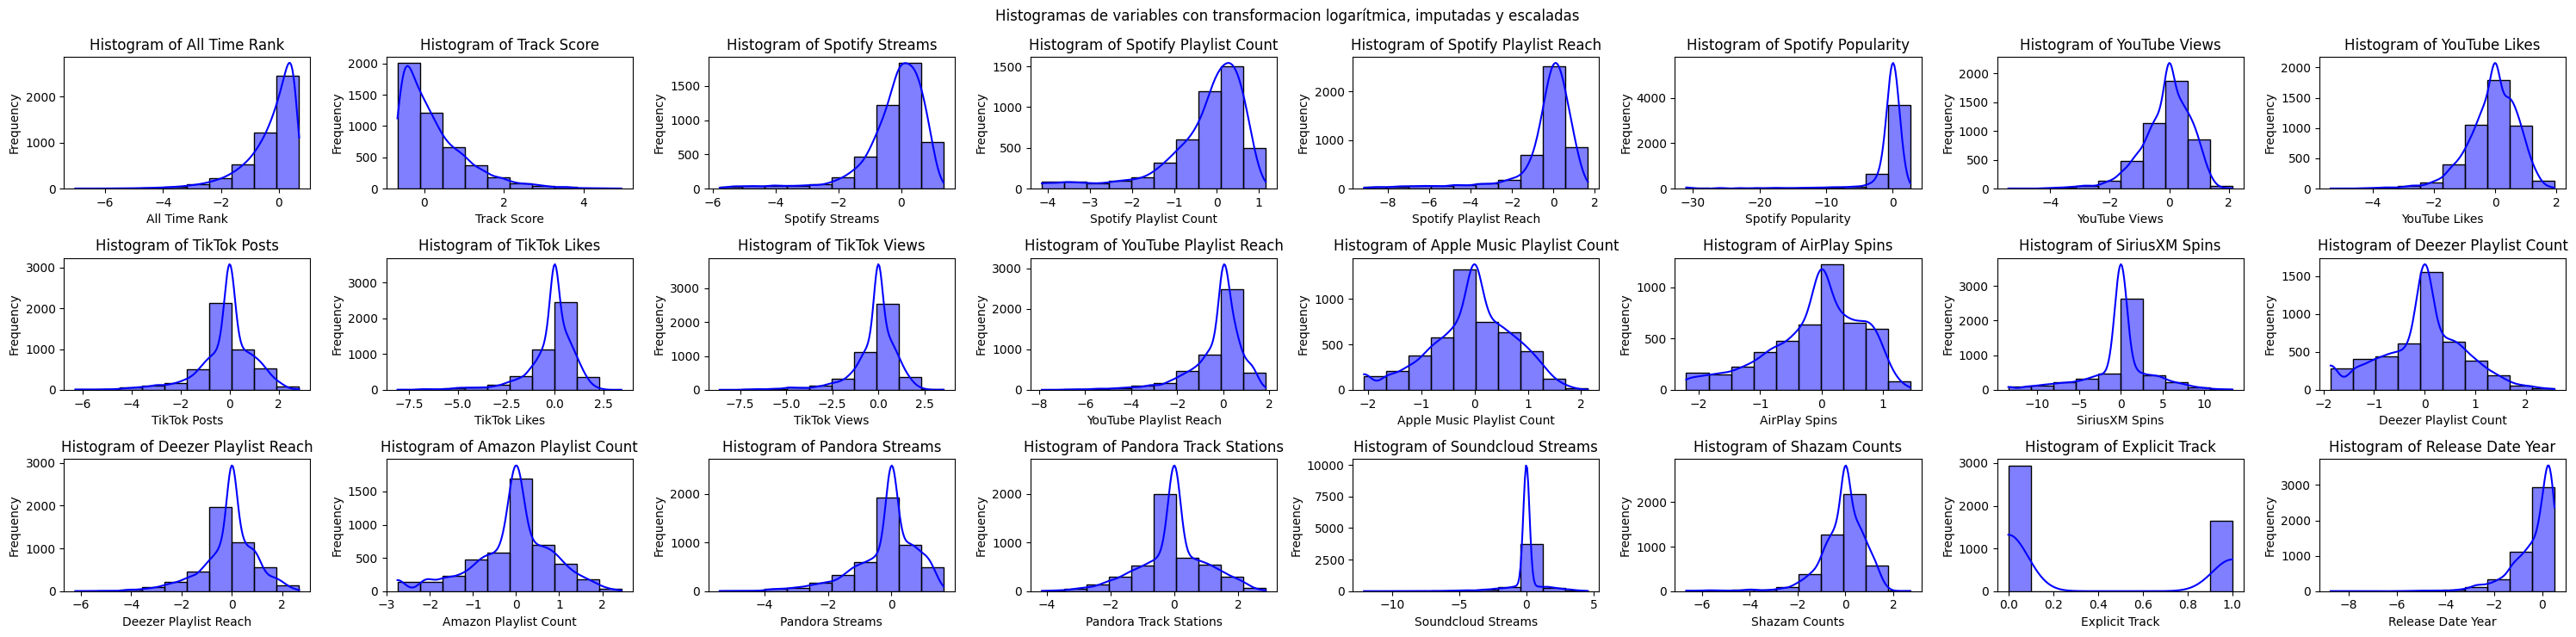

In [25]:
# Visualización Histogramas
numeric_columns = df_normalizado.select_dtypes(include='number').columns

n_cols = 8
n_rows = len(numeric_columns) // n_cols + int(len(numeric_columns) % n_cols != 0)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(30, 2.5 * n_rows))
axes = axes.flatten() if len(numeric_columns) > 1 else [axes]

for i, col in enumerate(numeric_columns):
    sns.histplot(df_normalizado[col], kde=True, ax=axes[i], color='blue', bins=10)
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle('Histogramas de variables con transformacion logarítmica, imputadas y escaladas')

plt.tight_layout()
plt.show()

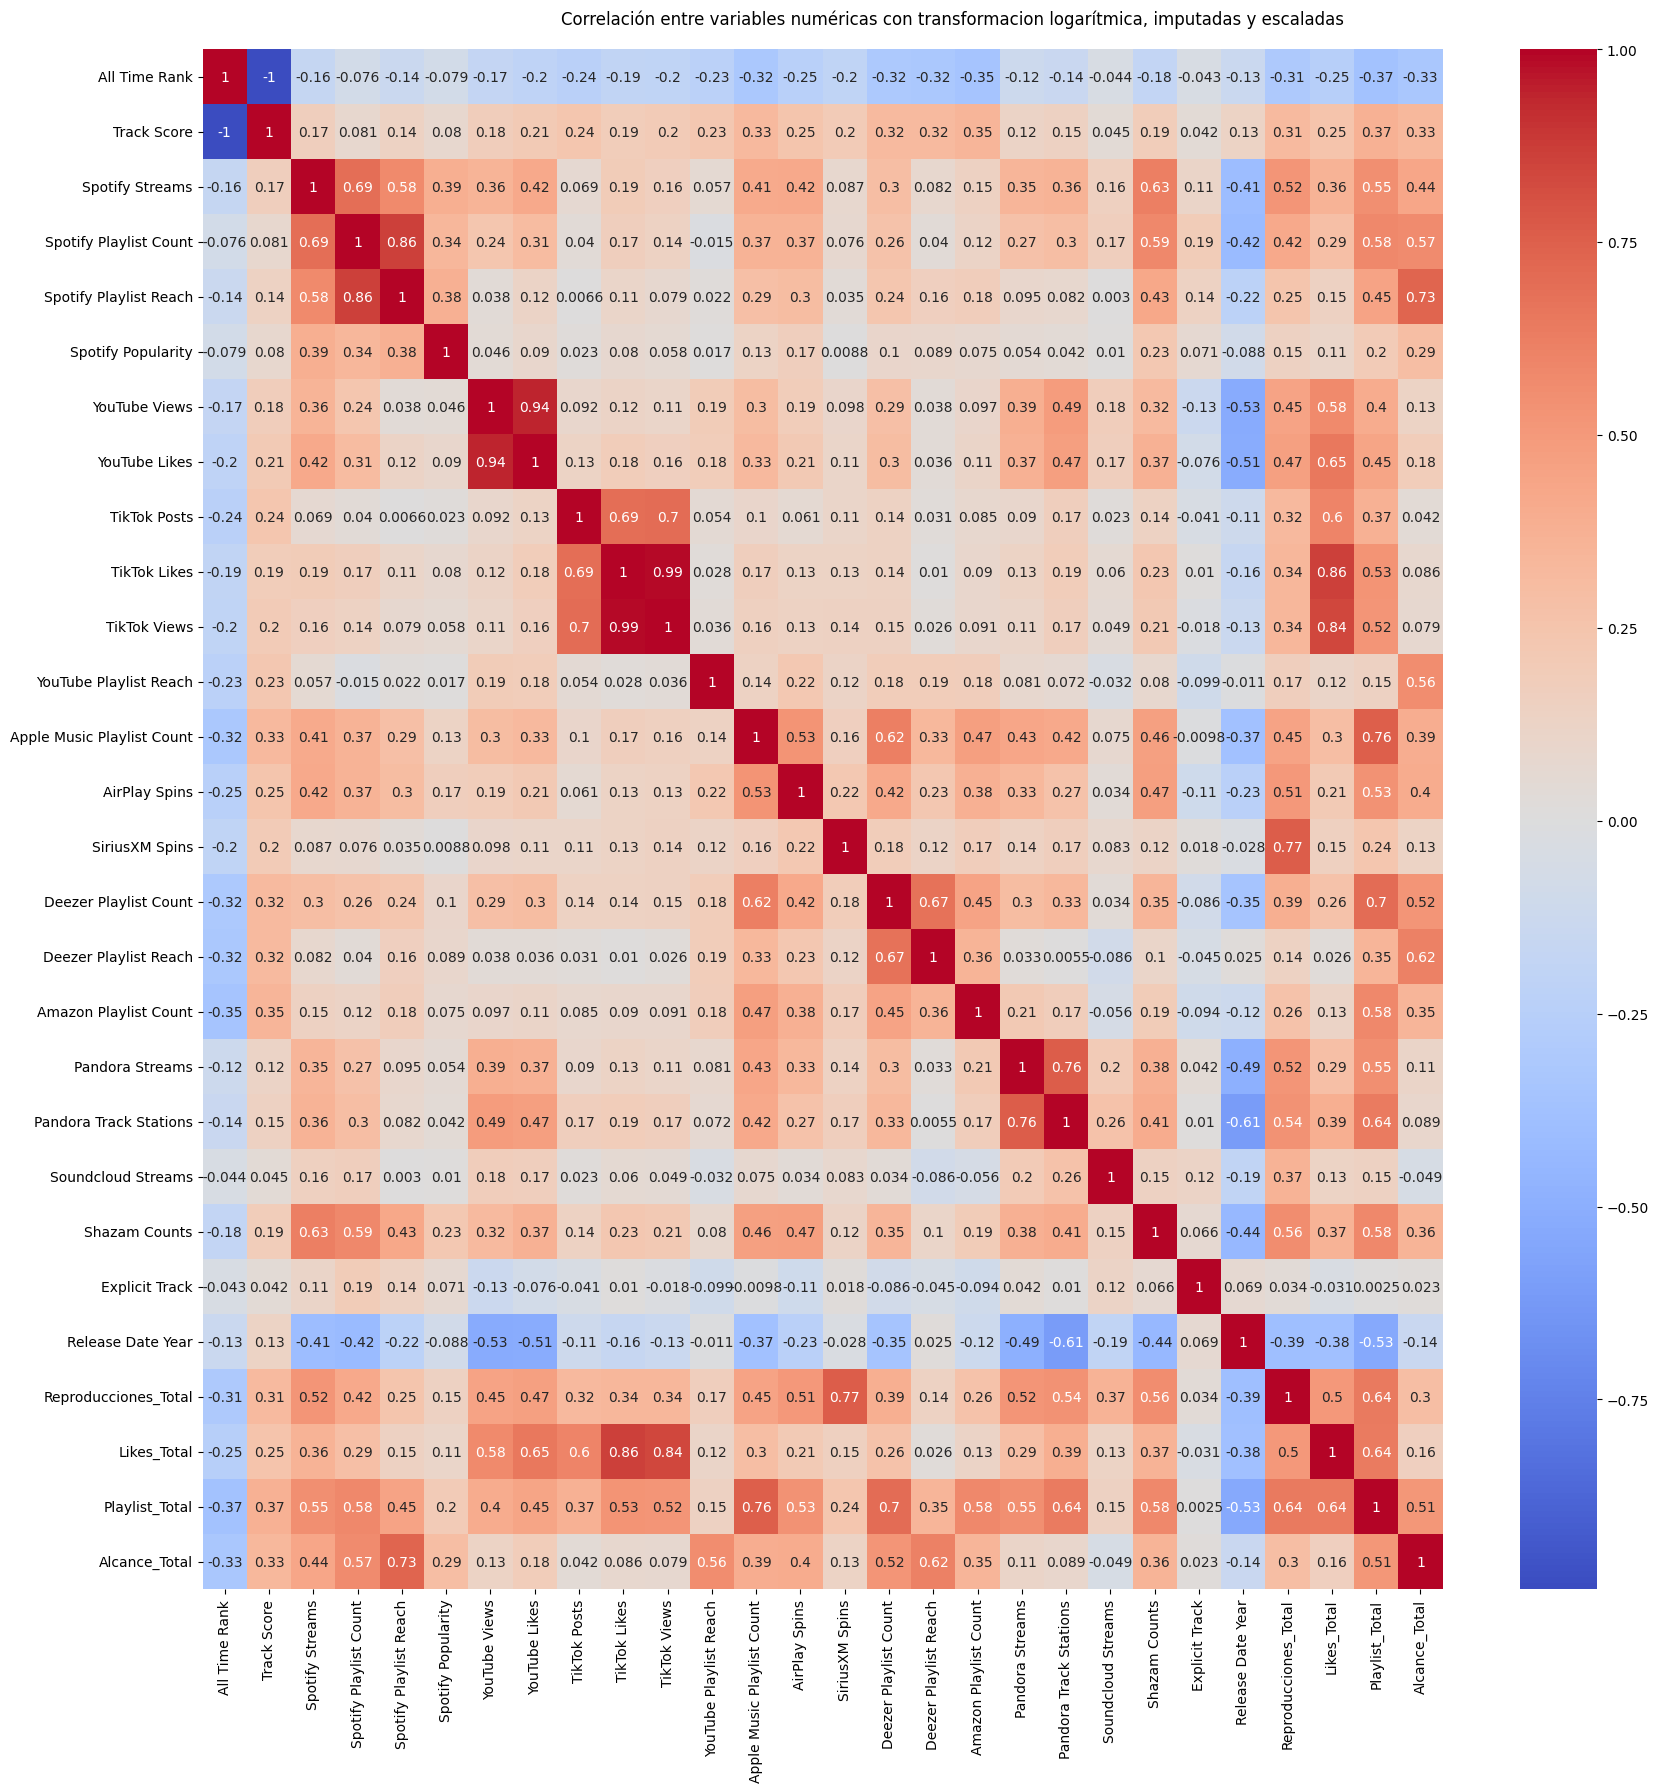

In [26]:
# Variables Adicionales
df_normalizado_add = df_normalizado.copy()
df_normalizado_add['Reproducciones_Total'] = df_normalizado_add[['Spotify Streams', 'YouTube Views', 'TikTok Posts', 'AirPlay Spins', 'SiriusXM Spins', 'Pandora Streams', 'Soundcloud Streams', 'Shazam Counts']].mean(1)
df_normalizado_add['Likes_Total'] = df_normalizado_add[['YouTube Likes', 'TikTok Likes']].mean(1)
df_normalizado_add['Playlist_Total'] = df_normalizado_add[['Spotify Playlist Count', 'TikTok Views', 'Apple Music Playlist Count', 'Deezer Playlist Count', 'Amazon Playlist Count', 'Pandora Track Stations']].mean(1)
df_normalizado_add['Alcance_Total'] = df_normalizado_add[['Spotify Playlist Reach', 'YouTube Playlist Reach', 'Deezer Playlist Reach']].mean(1)

plt.figure(figsize=(20, 20))
sns.heatmap(df_normalizado_add.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.suptitle('Correlación entre variables numéricas con transformacion logarítmica, imputadas y escaladas', y=0.9)
plt.show()

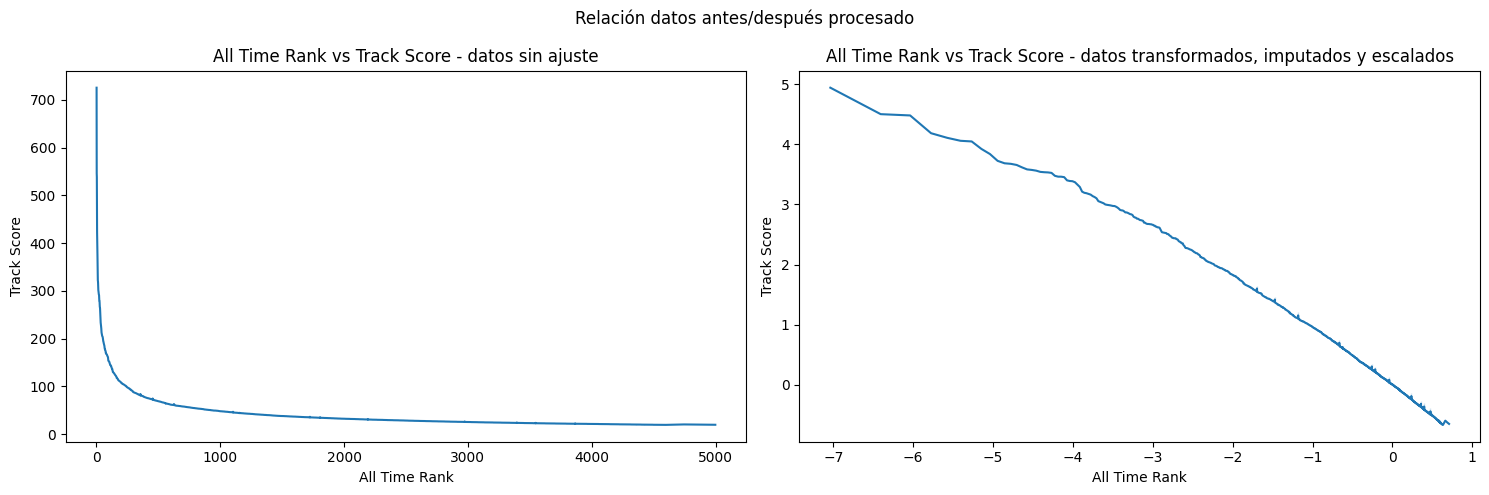

In [27]:
fig, axs = plt.subplots(1,2,figsize=(15,5))

sns.lineplot(data=df, x='All Time Rank', y='Track Score', ax=axs[0])
axs[0].set_title('All Time Rank vs Track Score - datos sin ajuste')

sns.lineplot(data=df_normalizado_add, x='All Time Rank', y='Track Score', ax=axs[1])
axs[1].set_title('All Time Rank vs Track Score - datos transformados, imputados y escalados')

fig.suptitle('Relación datos antes/después procesado')

plt.tight_layout()
plt.show()

#### Hallazgos

Comprender el impacto del contenido explícito en el streaming puede proporcionar información sobre cómo diferentes tipos de contenido es recibido por las audiencias. También puede ayudar a los artistas y sellos discográficos a tomar decisiones informadas sobre el contenido de su música y cómo podría afectar su alcance y popularidad.

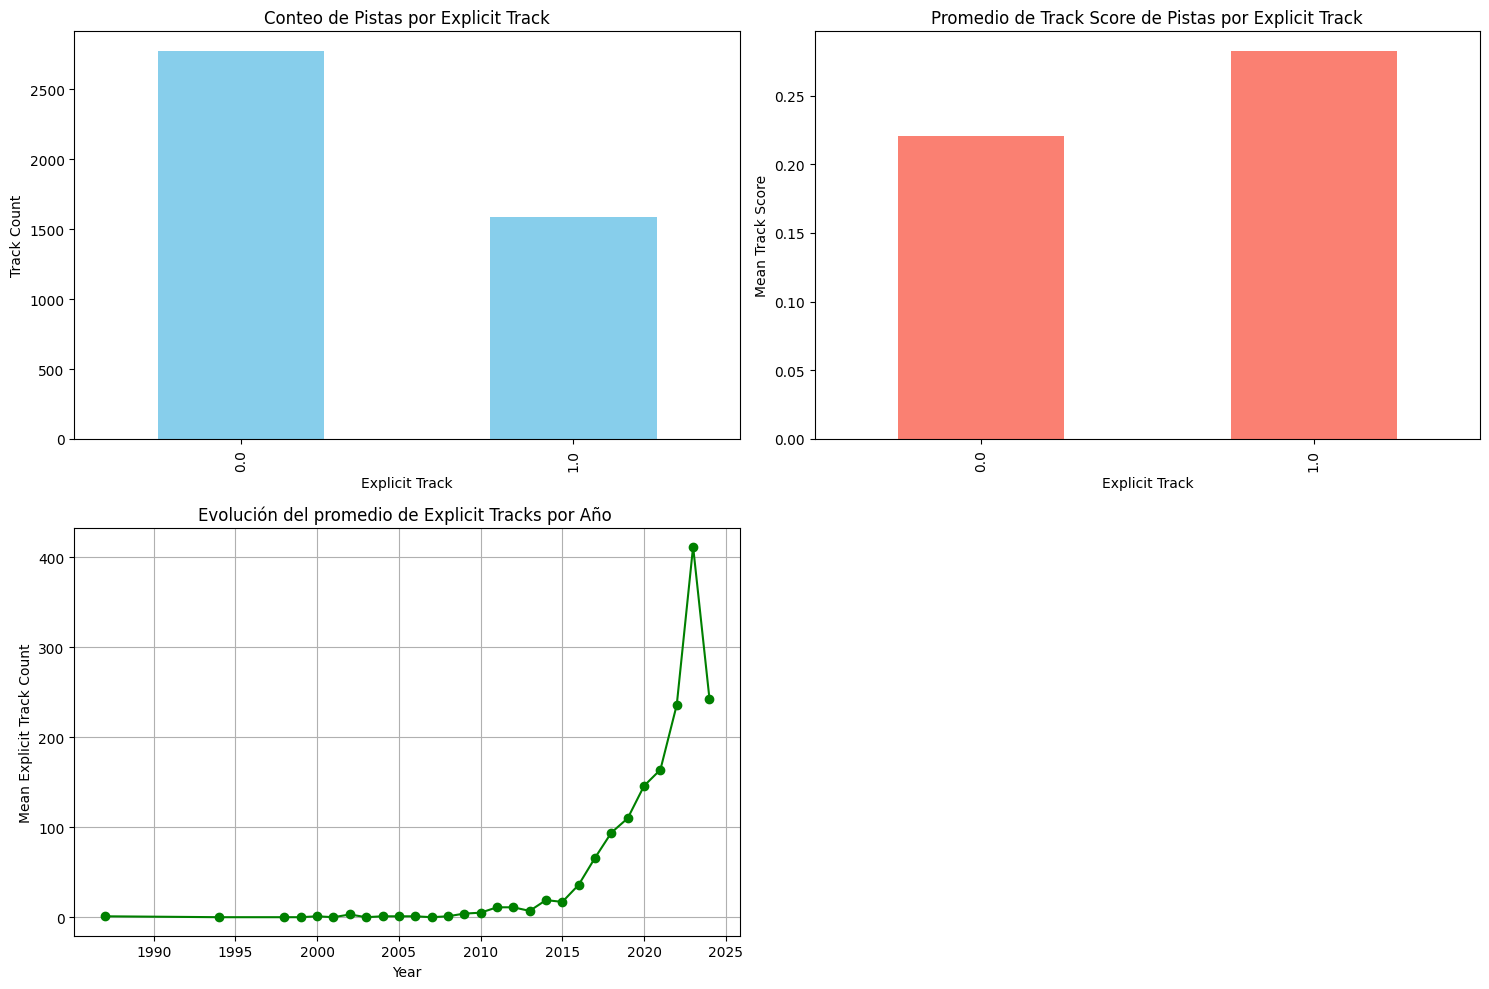

In [28]:
df_normalizado_add['Year'] = df_normalizado_add['Release Date'].dt.year
explicit_track = df_normalizado_add.loc[:, ['Explicit Track', 'Spotify Streams', 'Track', 'Track Score', 'Year']]
explicit_track.drop_duplicates(subset='Track', keep='first', inplace=True)

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Conteo de Pistas por Explicit Track
track_count = explicit_track.groupby('Explicit Track')['Track'].count()
track_count.plot(kind='bar', color='skyblue', ax=axes[0,0])
axes[0,0].set_title('Conteo de Pistas por Explicit Track')
axes[0,0].set_xlabel('Explicit Track')
axes[0,0].set_ylabel('Track Count')

# Promedio de Track Score de Pistas por Explicit Track
track_score_mean = explicit_track.groupby('Explicit Track')['Track Score'].mean()
track_score_mean.plot(kind='bar', color='salmon', ax=axes[0,1])
axes[0,1].set_title('Promedio de Track Score de Pistas por Explicit Track')
axes[0,1].set_xlabel('Explicit Track')
axes[0,1].set_ylabel('Mean Track Score')

# Evolución del promedio de Explicit Tracks por Año
mean_explicit_per_year = explicit_track.groupby('Year')['Explicit Track'].sum()
mean_explicit_per_year.plot(kind='line', marker='o', color='green', ax=axes[1,0])
axes[1,0].set_title('Evolución del promedio de Explicit Tracks por Año ')
axes[1,0].set_xlabel('Year')
axes[1,0].set_ylabel('Mean Explicit Track Count')
axes[1,0].grid(True)

# Remove the last empty subplot
fig.delaxes(axes[1, 1])

plt.tight_layout()
plt.show()

#### Artistas más populares por plataforma

Comprender el impacto de los artistas más escuchados en una plataforma es útil para identificar tendencias de consumo y preferencias del público. Este análisis ayuda a los artistas y a las empresas a ajustar sus estrategias de marketing, promoción y producción para alinearse con las demandas actuales del mercado.

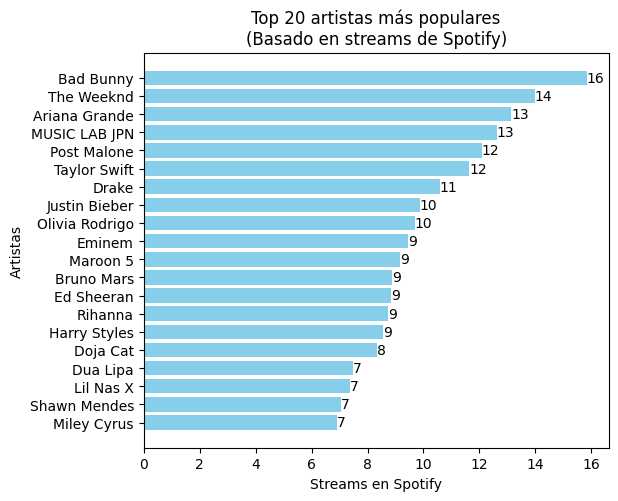

In [29]:
# Agrupación y ordenación por 'Artist' y 'Spotify Streams'
spotifyPop = df_normalizado_add.groupby('Artist')['Spotify Streams'].sum().reset_index()
spotifyPop.sort_values(by='Spotify Streams', ascending=False, inplace=True)

# Obtener los primeros 20 artistas y sus streams
artists = list(spotifyPop['Artist'].head(20)[::-1])
streams = list(spotifyPop['Spotify Streams'].head(20)[::-1])
streams_formatted = ['{:,.0f}'.format(x) for x in streams]

# Crear el gráfico de barras horizontal con Matplotlib
fig, ax = plt.subplots(figsize=(6, 5))

# Graficar las barras
bars = ax.barh(artists, streams, color='skyblue')

# Agregar texto con los streams formateados
for bar, stream_text in zip(bars, streams_formatted):
    ax.text(bar.get_width(), bar.get_y() + bar.get_height()/2, stream_text,
            va='center', ha='left')

# Título del gráfico
ax.set_title('Top 20 artistas más populares\n(Basado en streams de Spotify)')

# Etiquetas de los ejes
ax.set_xlabel('Streams en Spotify')
ax.set_ylabel('Artistas')

# Centrar el título
plt.subplots_adjust(top=0.9)
ax.title.set_position([0.5, 1.05])



# Mostrar gráfico
plt.show()

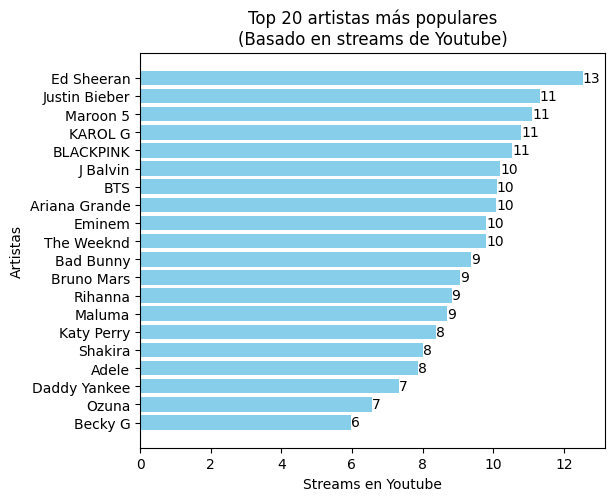

In [30]:
# Agrupación y ordenación por 'Artist' y 'YouTube Views'
YoutubePop = df_normalizado_add.groupby('Artist')['YouTube Views'].sum().reset_index()
YoutubePop.sort_values(by='YouTube Views', ascending=False, inplace=True)

# Obtener los primeros 20 artistas y sus streams
artists = list(YoutubePop['Artist'].head(20)[::-1])
streams = list(YoutubePop['YouTube Views'].head(20)[::-1])
streams_formatted = ['{:,.0f}'.format(x) for x in streams]

# Crear el gráfico de barras horizontal con Matplotlib
fig, ax = plt.subplots(figsize=(6, 5))

# Graficar las barras
bars = ax.barh(artists, streams, color='skyblue')

# Agregar texto con los streams formateados
for bar, stream_text in zip(bars, streams_formatted):
    ax.text(bar.get_width(), bar.get_y() + bar.get_height()/2, stream_text,
            va='center', ha='left')

# Título del gráfico
ax.set_title('Top 20 artistas más populares\n(Basado en streams de Youtube)')

# Etiquetas de los ejes
ax.set_xlabel('Streams en Youtube')
ax.set_ylabel('Artistas')

# Centrar el título
plt.subplots_adjust(top=0.9)
ax.title.set_position([0.5, 1.05])

# Mostrar gráfico
plt.show()

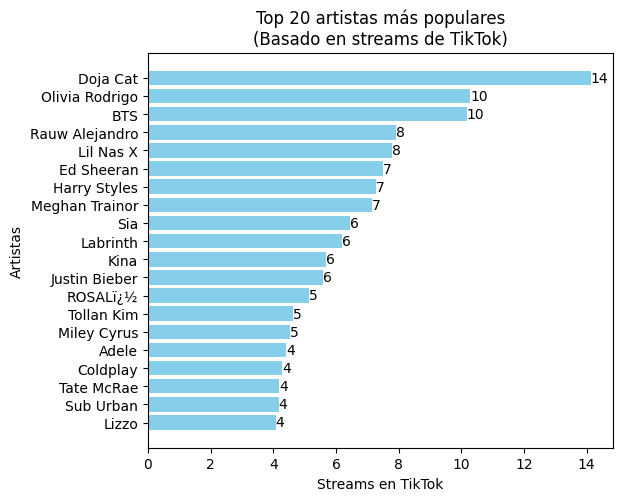

In [31]:
# Agrupación y ordenación por 'Artist' y 'TikTok Views'
TiktokPop = df_normalizado_add.groupby('Artist')['TikTok Views'].sum().reset_index()
TiktokPop.sort_values(by='TikTok Views', ascending=False, inplace=True)

# Obtener los primeros 20 artistas y sus streams
artists = list(TiktokPop['Artist'].head(20)[::-1])
streams = list(TiktokPop['TikTok Views'].head(20)[::-1])
streams_formatted = ['{:,.0f}'.format(x) for x in streams]

# Crear el gráfico de barras horizontal con Matplotlib
fig, ax = plt.subplots(figsize=(6, 5))

# Graficar las barras
bars = ax.barh(artists, streams, color='skyblue')

# Agregar texto con los streams formateados
for bar, stream_text in zip(bars, streams_formatted):
    ax.text(bar.get_width(), bar.get_y() + bar.get_height()/2, stream_text,
            va='center', ha='left')

# Título del gráfico
ax.set_title('Top 20 artistas más populares\n(Basado en streams de TikTok)')

# Etiquetas de los ejes
ax.set_xlabel('Streams en TikTok')
ax.set_ylabel('Artistas')

# Centrar el título
plt.subplots_adjust(top=0.9)
ax.title.set_position([0.5, 1.05])

# Mostrar gráfico
plt.show()

## Anexo: Pipeline Sklearn

Pipeline para automatizar proceso de limpieza y transformación de variables. Considera todas las variables tanto numéricas como no numéricas para volver a utilizar tanto para exploración como para modelado.

In [32]:
df = pd.read_csv('https://raw.githubusercontent.com/desareca/Tareas_Analisis_Datos-G6/main/Most%20Streamed%20Spotify%20Songs%202024.csv', encoding='ISO-8859-1')
df = df.drop_duplicates(subset='ISRC')
df = df[~df['Artist'].isna()]

In [33]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# ELimina columnas
class DropColumns(BaseEstimator, TransformerMixin):
    def __init__(self, columns_to_drop=None, duplicates_subset=None):
        self.columns_to_drop = columns_to_drop
        self.duplicates_subset = duplicates_subset

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.drop(columns=self.columns_to_drop, errors='ignore')  # Eliminar columnas
        return X

# Transforma data tipo fecha
class DateFeaturesExtractor(BaseEstimator, TransformerMixin):
    def __init__(self, date_column):
        self.date_column = date_column

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X[self.date_column] = pd.to_datetime(X[self.date_column], format='%m/%d/%Y', errors='coerce')
        X['Release Date Year'] = X[self.date_column].dt.year
        X['Release Date Month'] = X[self.date_column].dt.month_name()
        return X

# Transforma str a float
class Str2FloatTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, cols_plataformas):
        self.cols_plataformas = cols_plataformas

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        for col in self.cols_plataformas:
            X[col] = X[col].str.replace(',', '').astype(float)
        return X

# Transformacion logaritmica
class LogTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, cols_log_transform):
        self.cols_log_transform = cols_log_transform

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        for col in self.cols_log_transform:
            X[col + '_log'] = X[col].apply(lambda x: np.log(x) if x > 0 else np.nan)  # Evitar log(0)
        return X

# Crea Variables resumen
class FeaturesAddPlatforms(BaseEstimator, TransformerMixin):
    def __init__(self, cols_add_posicion):
        self.cols_add_posicion = cols_add_posicion

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        for cols_add in range(len(self.cols_add_posicion)):
            X = np.hstack((X, X[:, self.cols_add_posicion[cols_add]].mean(axis=1).reshape(-1,1)))
        return X

# Guarda nombre de columnas finales
class ColumnNameSaver(BaseEstimator, TransformerMixin):
    def __init__(self, column_names):
        self.column_names = column_names

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X

    def get_column_names(self):
        return self.column_names

In [34]:
columns_to_drop = ['TIDAL Popularity']

date_column = 'Release Date'

cols_plataformas = ['Spotify Streams', 'Spotify Playlist Count', 'Spotify Playlist Reach', 'YouTube Views', 'YouTube Likes',
                    'TikTok Posts', 'TikTok Likes', 'TikTok Views', 'YouTube Playlist Reach', 'AirPlay Spins',
                    'SiriusXM Spins', 'Deezer Playlist Reach', 'Pandora Streams', 'Pandora Track Stations',
                    'Soundcloud Streams', 'Shazam Counts', 'All Time Rank']

cols_transf_log = ['All Time Rank', 'Track Score', 'Spotify Streams', 'Spotify Playlist Count', 'Spotify Playlist Reach',
                   'Spotify Popularity', 'YouTube Views', 'YouTube Likes', 'TikTok Posts', 'TikTok Likes', 'TikTok Views',
                   'YouTube Playlist Reach', 'Apple Music Playlist Count', 'AirPlay Spins', 'SiriusXM Spins',
                   'Deezer Playlist Count', 'Deezer Playlist Reach', 'Amazon Playlist Count', 'Pandora Streams',
                   'Pandora Track Stations', 'Soundcloud Streams', 'Shazam Counts']


cols_imputed_scaled = ['All Time Rank', 'Track Score', 'Spotify Streams', 'Spotify Playlist Count', 'Spotify Playlist Reach',
                    'Spotify Popularity', 'YouTube Views', 'YouTube Likes', 'TikTok Posts', 'TikTok Likes', 'TikTok Views', 'YouTube Playlist Reach',
                    'Apple Music Playlist Count', 'AirPlay Spins', 'SiriusXM Spins', 'Deezer Playlist Count', 'Deezer Playlist Reach',
                    'Amazon Playlist Count', 'Pandora Streams', 'Pandora Track Stations', 'Soundcloud Streams', 'Shazam Counts', 'Explicit Track',
                    'Release Date Year', 'All Time Rank_log', 'Track Score_log', 'Spotify Streams_log', 'Spotify Playlist Count_log',
                    'Spotify Playlist Reach_log', 'Spotify Popularity_log', 'YouTube Views_log', 'YouTube Likes_log', 'TikTok Posts_log',
                    'TikTok Likes_log', 'TikTok Views_log', 'YouTube Playlist Reach_log', 'Apple Music Playlist Count_log', 'AirPlay Spins_log',
                    'SiriusXM Spins_log', 'Deezer Playlist Count_log', 'Deezer Playlist Reach_log', 'Amazon Playlist Count_log',
                    'Pandora Streams_log', 'Pandora Track Stations_log', 'Soundcloud Streams_log', 'Shazam Counts_log']

cols_text = ['Track', 'Album Name', 'Artist', 'Release Date', 'ISRC']

cols_add_platform = [['Spotify Streams', 'YouTube Views', 'TikTok Posts', 'AirPlay Spins', 'SiriusXM Spins', 'Pandora Streams', 'Soundcloud Streams', 'Shazam Counts'],
                     ['YouTube Likes', 'TikTok Likes'],
                     ['Spotify Playlist Count', 'TikTok Views', 'Apple Music Playlist Count', 'Deezer Playlist Count', 'Amazon Playlist Count', 'Pandora Track Stations'],
                     ['Spotify Playlist Reach', 'YouTube Playlist Reach', 'Deezer Playlist Reach'],
                     ['Spotify Streams_log', 'YouTube Views_log', 'TikTok Posts_log', 'AirPlay Spins_log', 'SiriusXM Spins_log', 'Pandora Streams_log', 'Soundcloud Streams_log', 'Shazam Counts_log'],
                     ['YouTube Likes_log', 'TikTok Likes_log'],
                     ['Spotify Playlist Count_log', 'TikTok Views_log', 'Apple Music Playlist Count_log', 'Deezer Playlist Count_log', 'Amazon Playlist Count_log', 'Pandora Track Stations_log'],
                     ['Spotify Playlist Reach_log', 'YouTube Playlist Reach_log', 'Deezer Playlist Reach_log']]

cols_end = ['Track', 'Album Name', 'Artist', 'Release Date', 'ISRC']
cols_end = cols_end + ['All Time Rank', 'Track Score', 'Spotify Streams', 'Spotify Playlist Count', 'Spotify Playlist Reach',
                       'Spotify Popularity', 'YouTube Views', 'YouTube Likes', 'TikTok Posts', 'TikTok Likes', 'TikTok Views',
                       'YouTube Playlist Reach', 'Apple Music Playlist Count', 'AirPlay Spins', 'SiriusXM Spins', 'Deezer Playlist Count',
                       'Deezer Playlist Reach', 'Amazon Playlist Count', 'Pandora Streams', 'Pandora Track Stations', 'Soundcloud Streams',
                       'Shazam Counts', 'Explicit Track', 'Release Date Year', 'All Time Rank_log', 'Track Score_log', 'Spotify Streams_log',
                       'Spotify Playlist Count_log', 'Spotify Playlist Reach_log', 'Spotify Popularity_log', 'YouTube Views_log', 'YouTube Likes_log',
                       'TikTok Posts_log', 'TikTok Likes_log', 'TikTok Views_log', 'YouTube Playlist Reach_log', 'Apple Music Playlist Count_log',
                       'AirPlay Spins_log', 'SiriusXM Spins_log', 'Deezer Playlist Count_log', 'Deezer Playlist Reach_log', 'Amazon Playlist Count_log',
                       'Pandora Streams_log', 'Pandora Track Stations_log', 'Soundcloud Streams_log', 'Shazam Counts_log']

cols_end = cols_end + ['Reproducciones_Total', 'Likes_Total', 'Playlist_Total', 'Alcance_Total', 'Reproducciones_Total_log', 'Likes_Total_log', 'Playlist_Total_log', 'Alcance_Total_log']

posiciones = {texto: i + 5 for i, texto in enumerate(cols_imputed_scaled)}
posiciones_en_desordenada = [[posiciones[texto] for texto in l] for l in cols_add_platform]

pipeline = Pipeline([
    ('column_names', ColumnNameSaver(column_names=cols_end)),
    ('drop_cols_duplicates', DropColumns(columns_to_drop=columns_to_drop)),
    ('date_features', DateFeaturesExtractor(date_column=date_column)),
    ('str2float_transform', Str2FloatTransformer(cols_plataformas=cols_plataformas)),
    ('log_transform', LogTransformer(cols_log_transform=cols_transf_log)),
    ('imputer_scaler', ColumnTransformer([
        ('text', 'passthrough', cols_text),
        ('num', Pipeline([('imputer', SimpleImputer(strategy='median')), ('scaler', RobustScaler())]), cols_imputed_scaled)
        ])
    ),
    ('add_cols', FeaturesAddPlatforms(cols_add_posicion=posiciones_en_desordenada))
])

pipeline.fit(df)

joblib.dump(pipeline, 'pipeline.pkl')

['pipeline.pkl']

In [35]:
loaded_pipeline = joblib.load('pipeline.pkl')
loaded_pipeline

Pipeline(steps=[('column_names',
                 ColumnNameSaver(column_names=['Track', 'Album Name', 'Artist',
                                               'Release Date', 'ISRC',
                                               'All Time Rank', 'Track Score',
                                               'Spotify Streams',
                                               'Spotify Playlist Count',
                                               'Spotify Playlist Reach',
                                               'Spotify Popularity',
                                               'YouTube Views', 'YouTube Likes',
                                               'TikTok Posts', 'TikTok Likes',
                                               'TikTok Views',
                                               'YouTube Playlist Reach',
                                               'Apple Music Playlist Count',
                                               'AirPla...
                                                   'Explicit Track',
                                                   'Release Date Year',
                                                   'All Time Rank_log',
                                                   'Track Score_log',
                                                   'Spotify Streams_log',
                                                   'Spotify Playlist Count_log',
                                                   'Spotify Playlist Reach_log',
                                                   'Spotify Popularity_log', ...])])),
                ('add_cols',
                 FeaturesAddPlatforms(cols_add_posicion=[[7, 11, 13, 18, 19, 23,
                                                          25, 26],
                                                         [12, 14],
                                                         [8, 15, 17, 20, 22,
                                                          24],
                                                         [9, 16, 21],
                                                         [31, 35, 37, 42, 43,
                                                          47, 49, 50],
                                                         [36, 38],
                                                         [32, 39, 41, 44, 46,
                                                          48],
                                                         [33, 40, 45]]))])

In [36]:
df_transformed = loaded_pipeline.transform(df)
pd.DataFrame(df_transformed, columns=loaded_pipeline.named_steps['column_names'].get_column_names()).head()

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,Soundcloud Streams_log,Shazam Counts_log,Reproducciones_Total,Likes_Total,Playlist_Total,Alcance_Total,Reproducciones_Total_log,Likes_Total_log,Playlist_Total_log,Alcance_Total_log
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,2024-04-26,QM24S2402528,-0.999127,32.962085,0.278907,-0.020445,7.505399,...,0.389189,0.554918,194153.181453,5.459371,3.556187,13.592513,1.199256,0.887124,1.020333,1.285195
1,Not Like Us,Not Like Us,Kendrick Lamar,2024-05-04,USUG12400910,-0.998691,24.454976,0.155273,-0.053779,6.603509,...,0.707295,0.131029,419725.744421,0.4573,1.940179,8.751419,-1.035158,0.324384,0.741381,1.180644
2,i like the way you kiss me,I like the way you kiss me,Artemas,2024-03-19,QZJ842400387,-0.998255,24.099526,0.669321,0.28197,8.118384,...,0.792017,0.887756,492926.230871,2.307019,3.864876,26.021423,1.167261,0.734048,1.056128,1.550178
3,Flowers,Flowers - Single,Miley Cyrus,2023-01-12,USSM12209777,-0.997818,19.668246,3.31723,3.041306,5.046985,...,0.0,1.280021,18.328076,10.669169,11.365791,22.347735,2.150831,1.46788,1.750934,1.717268
4,Houdini,Houdini,Eminem,2024-05-31,USUG12403398,-0.997382,18.64455,-0.245938,-0.321298,5.656889,...,-2.757437,-0.304949,-382261.687991,0.414364,1.775027,12.955511,-2.329623,0.265756,0.575107,1.195911
